# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
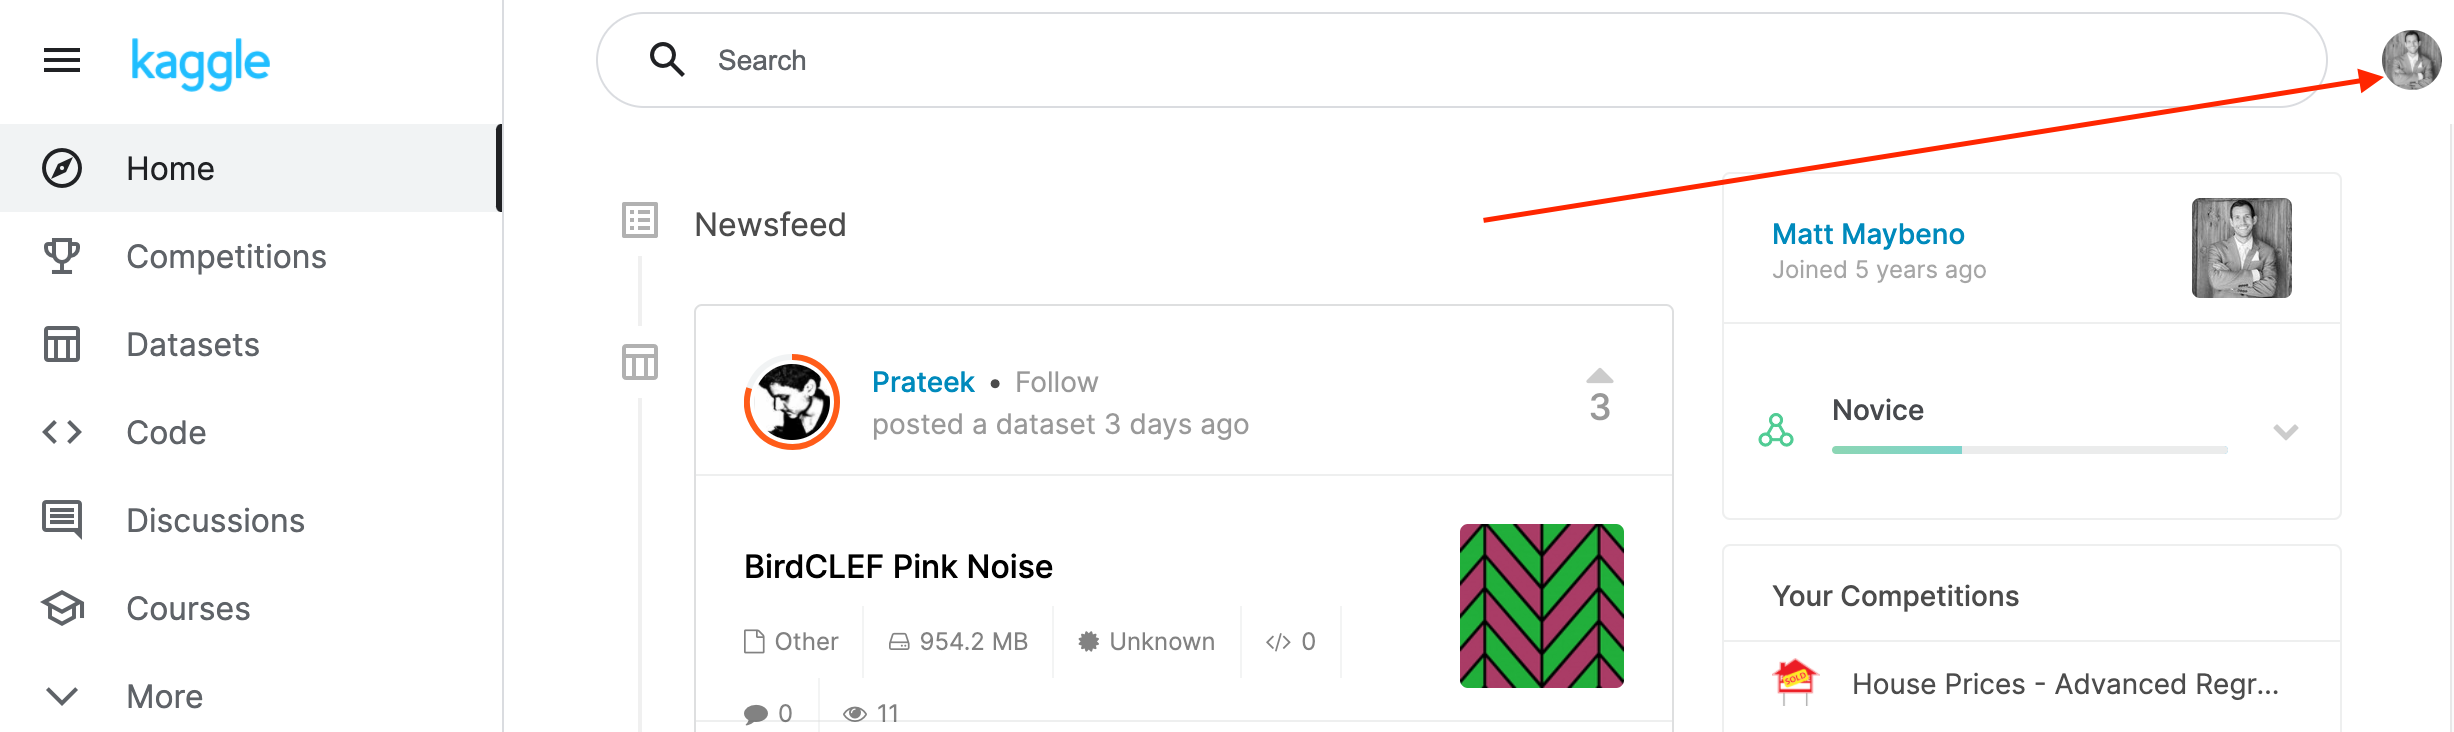
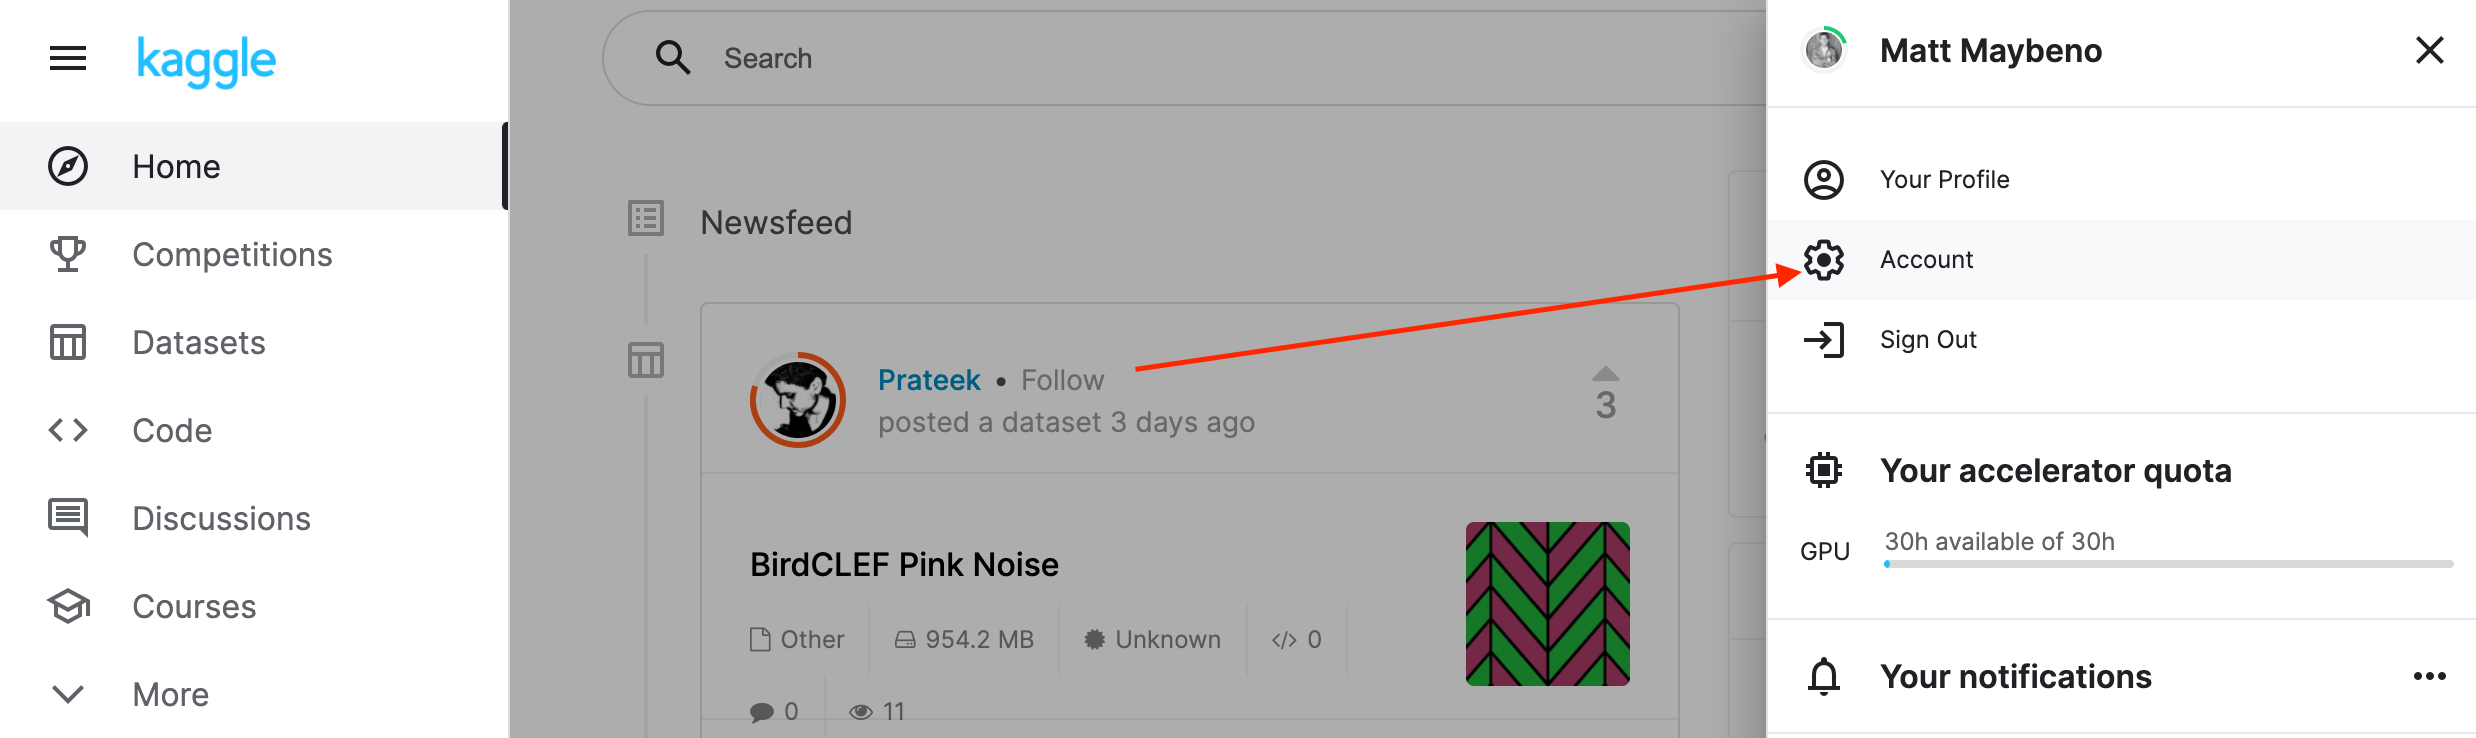
2. Scroll down to API and click Create New API Token.
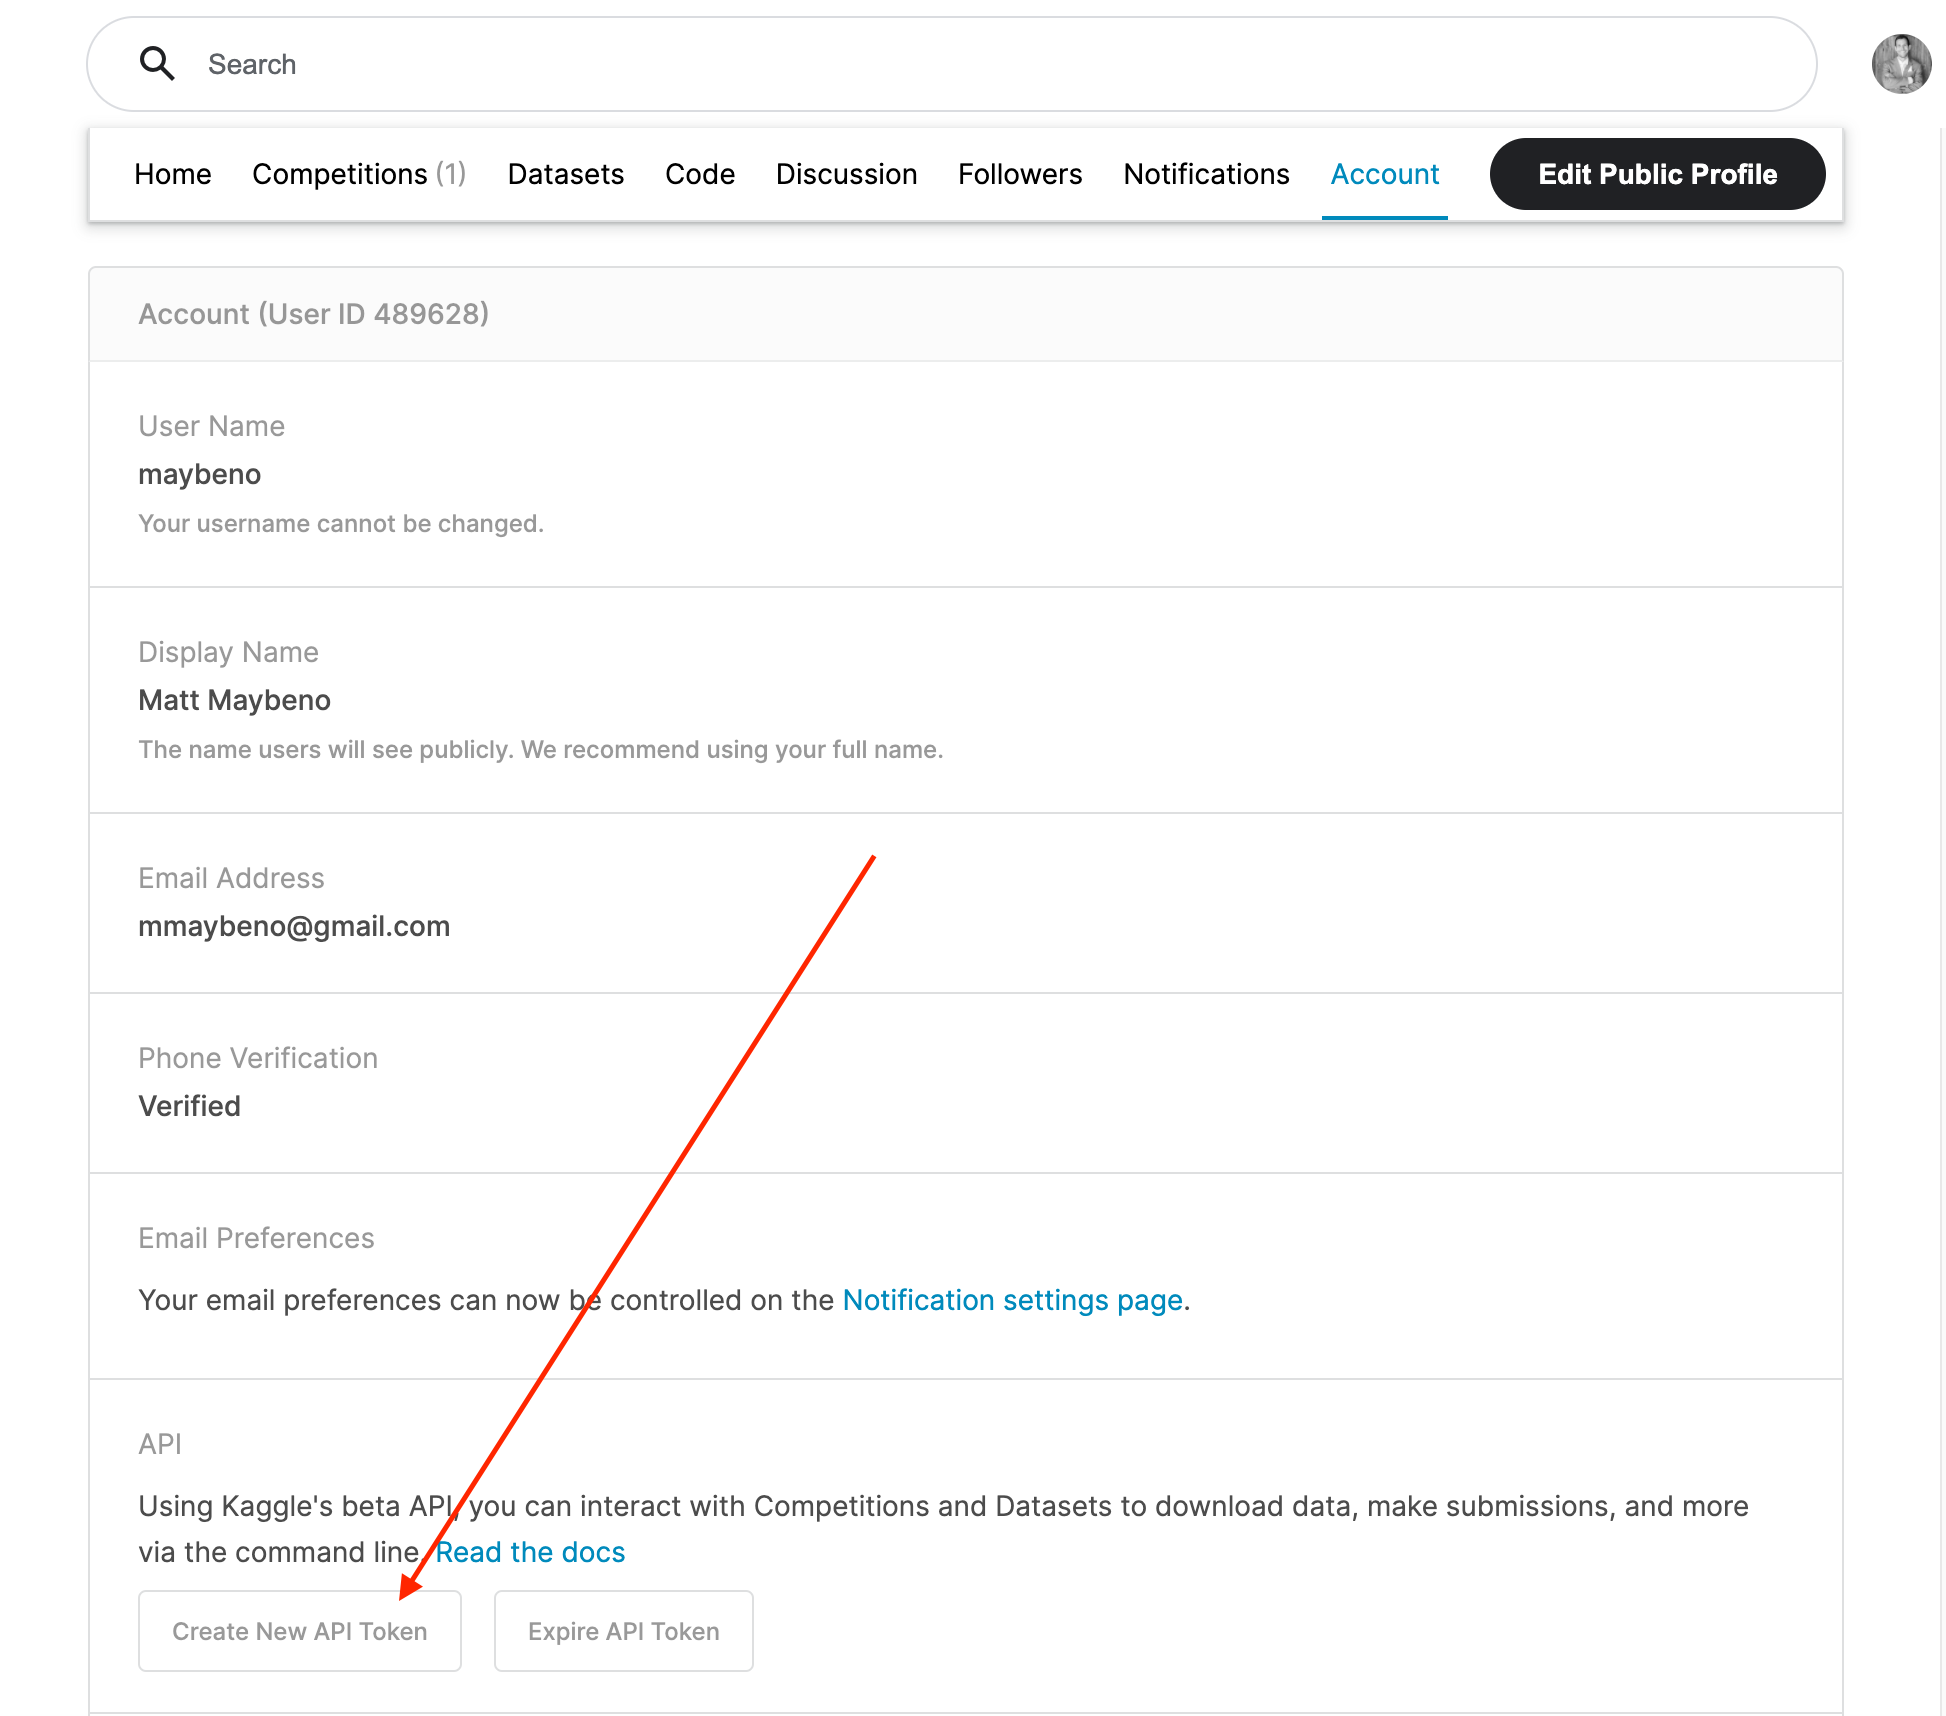
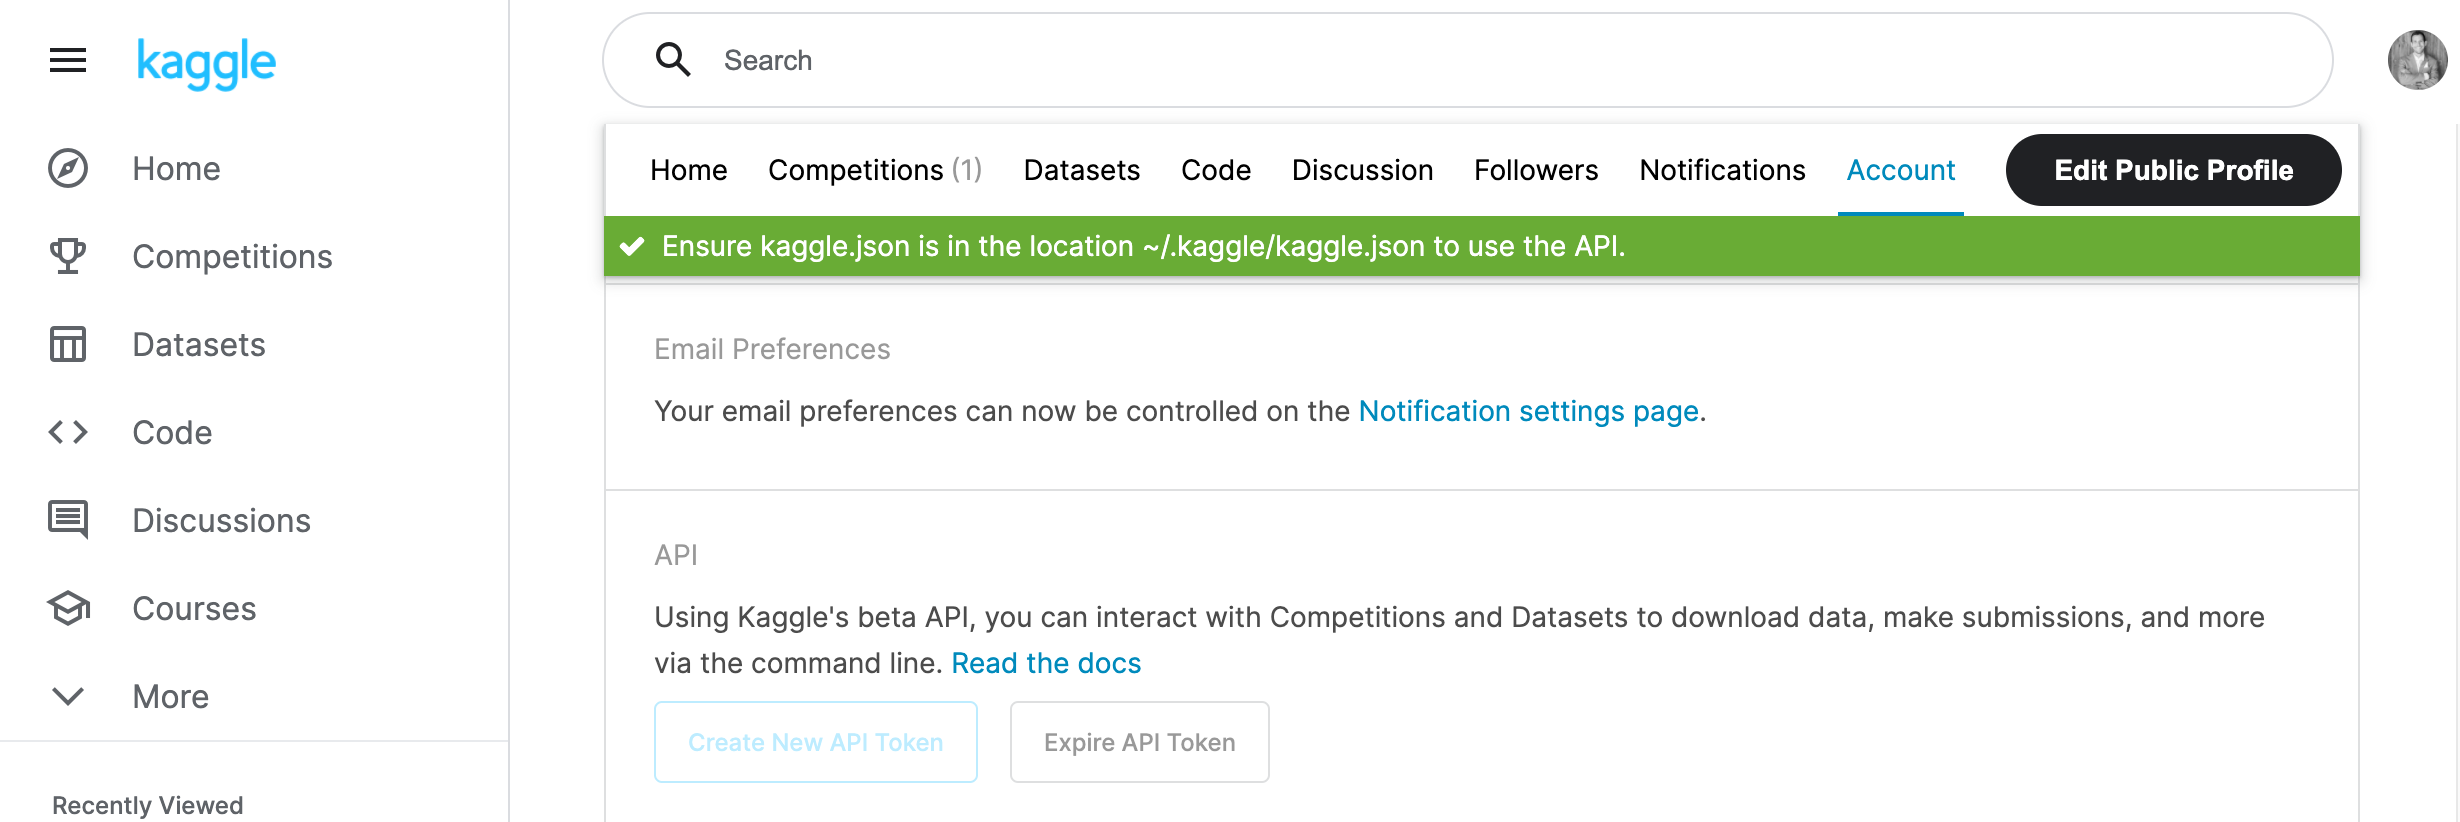
3. Open up `kaggle.json` and use the username and key.
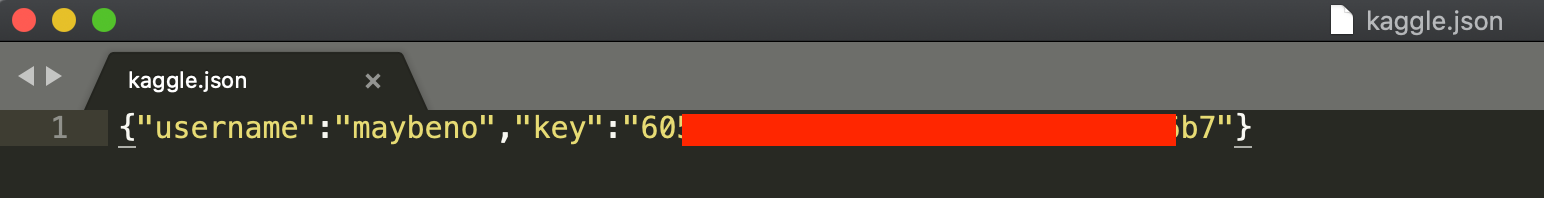

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [27]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json
!pip install -U kaggle

The syntax of the command is incorrect.
'touch' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = ""
kaggle_key = ""

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
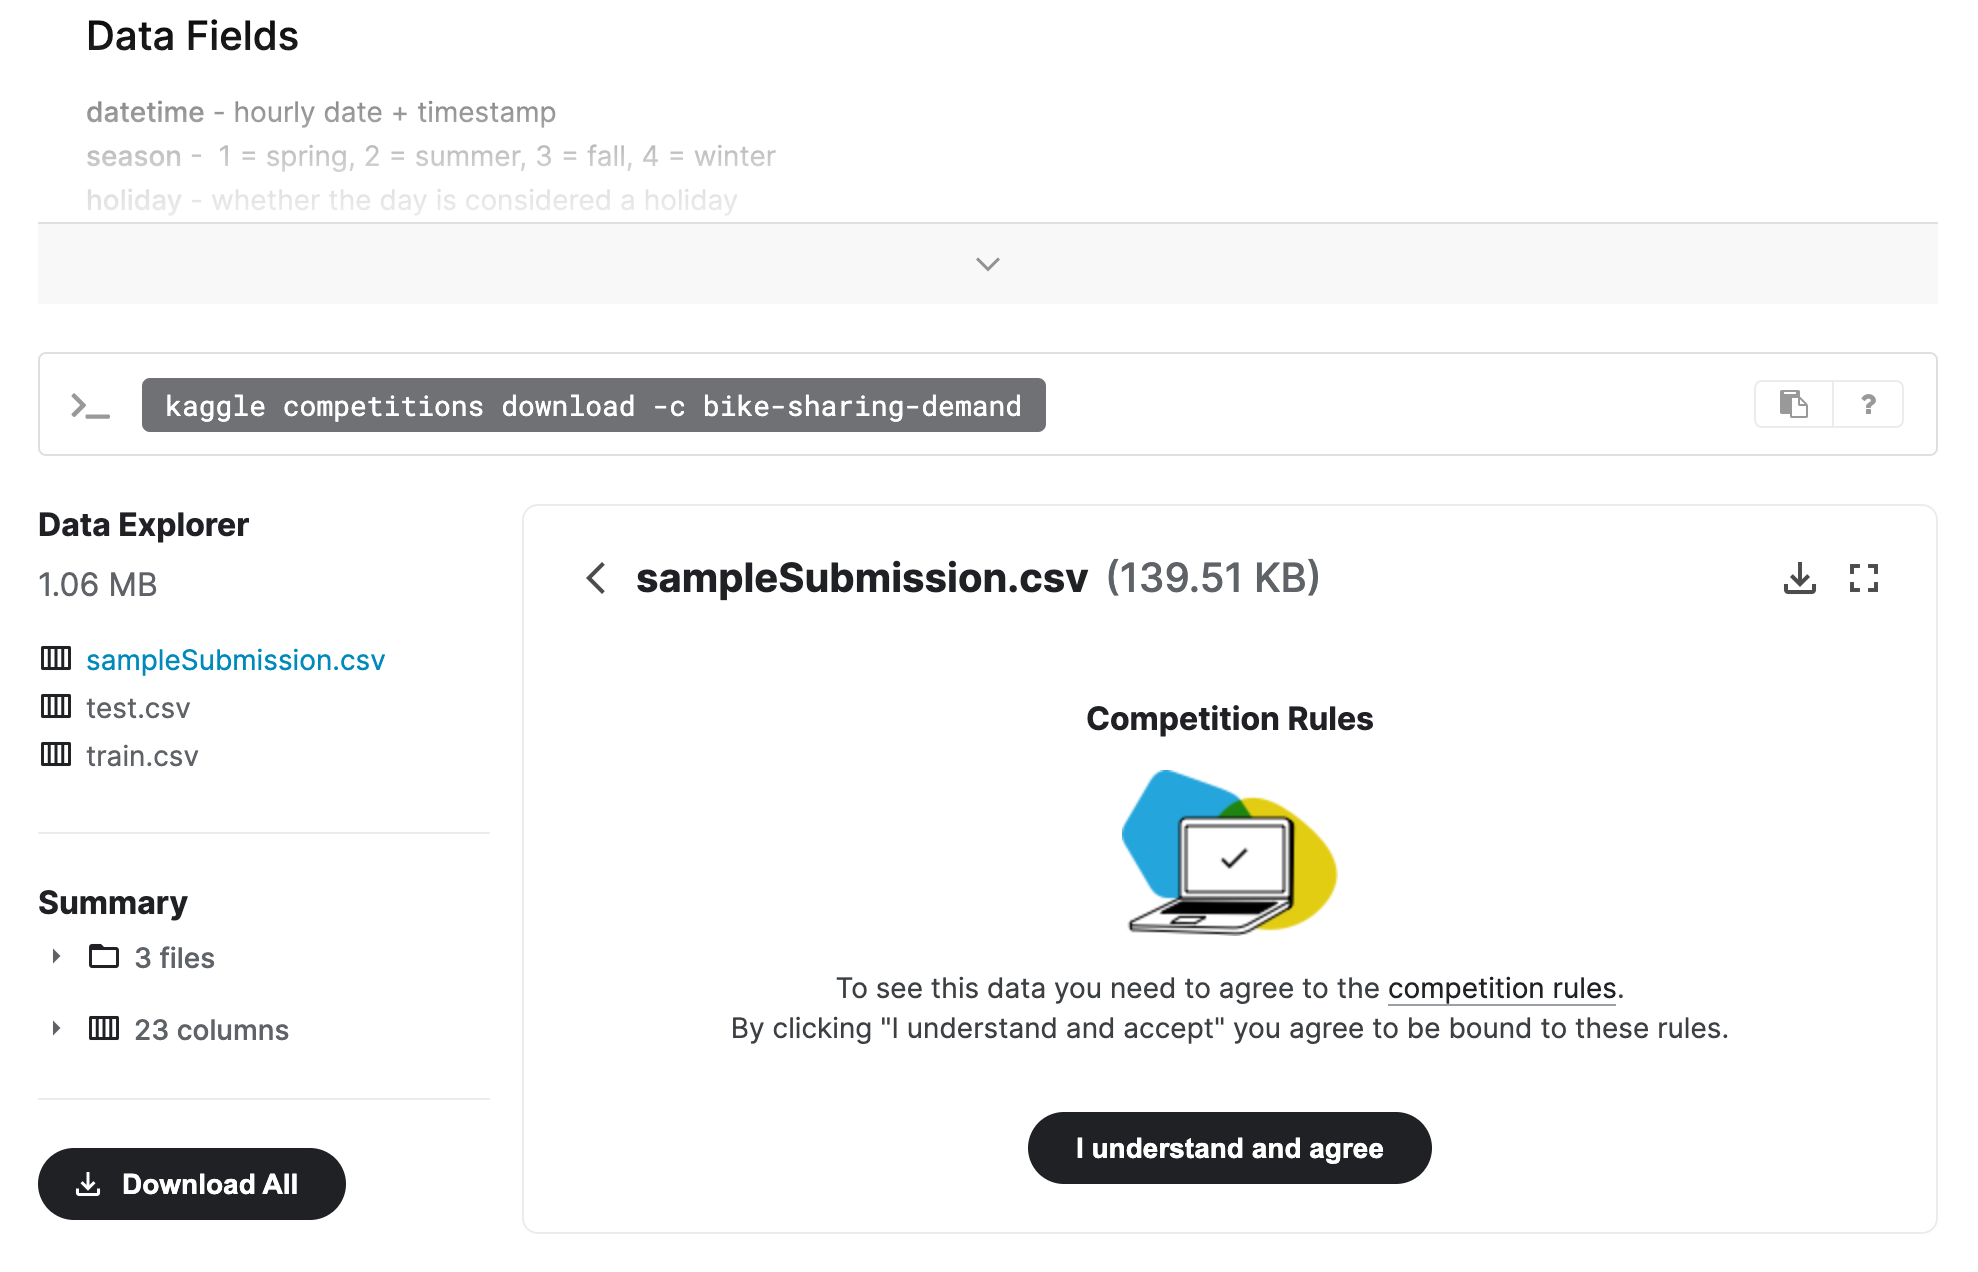

In [30]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

In [31]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [32]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train_date = train[["datetime"]]

season_df =  pd.get_dummies(train.season, prefix = "season_")
weather_df =  pd.get_dummies(train.weather, prefix = "weather_")
train.drop(columns = ["season", "weather", "datetime","registered", "casual"], inplace = True)

train = pd.concat( [season_df, weather_df, train], axis = 1)
train.head()

,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4,holiday,workingday,temp,atemp,humidity,windspeed,count
0,1,0,0,0,1,0,0,0,0,0,9.84,14.395,81,0.0,16
1,1,0,0,0,1,0,0,0,0,0,9.02,13.635,80,0.0,40
2,1,0,0,0,1,0,0,0,0,0,9.02,13.635,80,0.0,32
3,1,0,0,0,1,0,0,0,0,0,9.84,14.395,75,0.0,13
4,1,0,0,0,1,0,0,0,0,0,9.84,14.395,75,0.0,1


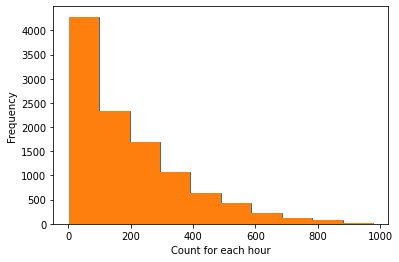

In [33]:
#EDA
import numpy as np 
import matplotlib.pyplot as plt 

counts, bins = np.histogram(train["count"])
plt.xlabel("Count for each hour")
plt.ylabel("Frequency")
plt.stairs(counts, bins)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

In [34]:
u_vals, freq = np.unique(train["workingday"], return_counts = True)

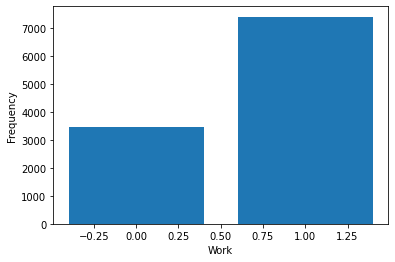

In [35]:
counts, bins = np.histogram(train["workingday"])
plt.xlabel("Work")
plt.ylabel("Frequency")
# plt.stairs(counts, bins)
plt.bar(x =u_vals , height = freq, align = "center", label = ["Working day", "Not A Working Day"])
plt.show()

In [36]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.

In [37]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
# test.drop(columns =["datetime], inplace = True)
test_date = test[["datetime"]]


season_df_test =  pd.get_dummies(test.season, prefix = "season_")
weather_df_test =  pd.get_dummies(test.weather, prefix = "weather_")
test.drop(columns = ["season", "weather", "datetime"], inplace = True)

test = pd.concat( [season_df_test, weather_df_test, test], axis = 1)
test.head()

,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4,holiday,workingday,temp,atemp,humidity,windspeed
0,1,0,0,0,1,0,0,0,0,1,10.66,11.365,56,26.0027
1,1,0,0,0,1,0,0,0,0,1,10.66,13.635,56,0.0000
2,1,0,0,0,1,0,0,0,0,1,10.66,13.635,56,0.0000
3,1,0,0,0,1,0,0,0,0,1,10.66,12.880,56,11.0014
4,1,0,0,0,1,0,0,0,0,1,10.66,12.880,56,11.0014


In [38]:
test_date

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 01:00:00
2,2011-01-20 02:00:00
3,2011-01-20 03:00:00
4,2011-01-20 04:00:00
...,...
6488,2012-12-31 19:00:00
6489,2012-12-31 20:00:00
6490,2012-12-31 21:00:00
6491,2012-12-31 22:00:00


In [39]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season__1   10886 non-null  uint8  
 1   season__2   10886 non-null  uint8  
 2   season__3   10886 non-null  uint8  
 3   season__4   10886 non-null  uint8  
 4   weather__1  10886 non-null  uint8  
 5   weather__2  10886 non-null  uint8  
 6   weather__3  10886 non-null  uint8  
 7   weather__4  10886 non-null  uint8  
 8   holiday     10886 non-null  int64  
 9   workingday  10886 non-null  int64  
 10  temp        10886 non-null  float64
 11  atemp       10886 non-null  float64
 12  humidity    10886 non-null  int64  
 13  windspeed   10886 non-null  float64
 14  count       10886 non-null  int64  
dtypes: float64(3), int64(4), uint8(8)
memory usage: 680.5 KB


In [41]:
train.describe()

,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4,holiday,workingday,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.246739,0.251056,0.251056,0.251148,0.660665,0.260334,0.078909,0.000092,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,191.574132
std,0.431133,0.433641,0.433641,0.433694,0.473505,0.438837,0.269609,0.009584,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,181.144454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [42]:
# bokeh basics
from bokeh.plotting import figure
from bokeh.io import show, output_notebook

# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Example Glyphs',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = [1, 3, 4, 5, 8]
squares_y = [8, 7, 3, 1, 10]
circles_x = [9, 12, 4, 3, 15]
circles_y = [8, 4, 11, 6, 10]

# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6)
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red')

# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)







Loading BokehJS ...

In [43]:
from sklearn.model_selection import train_test_split
df_train, df_validate = train_test_split(train, train_size = 0.8) 

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [44]:
predictor = TabularPredictor(label = "count", problem_type ="regression").fit(train, presets = "best_quality", time_limit = 600)

No path specified. Models will be saved in: "AutogluonModels/ag-20230113_024513/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230113_024513/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2488.72 MB
	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

### Review AutoGluon's training run with ranking of models that did the best.

In [46]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -139.368940       6.004173  438.570677                0.000815           0.407937            3       True         20
1     ExtraTreesMSE_BAG_L2 -140.113162       4.447798  223.473251                0.598897           8.219379            2       True         16
2          CatBoost_BAG_L2 -140.522685       3.900502  252.541141                0.051601          37.287269            2       True         15
3      WeightedEnsemble_L2 -141.092400       2.931396  154.637783                0.001069           0.644357            2       True         11
4        LightGBMXT_BAG_L2 -141.115884       3.969226  233.971522                0.120325          18.717649            2       True         12
5           XGBoost_BAG_L2 -141.342393       3.931866  237.531256         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'Ligh

In [47]:
test

,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4,holiday,workingday,temp,atemp,humidity,windspeed
0,1,0,0,0,1,0,0,0,0,1,10.66,11.365,56,26.0027
1,1,0,0,0,1,0,0,0,0,1,10.66,13.635,56,0.0000
2,1,0,0,0,1,0,0,0,0,1,10.66,13.635,56,0.0000
3,1,0,0,0,1,0,0,0,0,1,10.66,12.880,56,11.0014
4,1,0,0,0,1,0,0,0,0,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,0,0,0,1,0,0,0,1,10.66,12.880,60,11.0014
6489,1,0,0,0,0,1,0,0,0,1,10.66,12.880,60,11.0014
6490,1,0,0,0,1,0,0,0,0,1,10.66,12.880,60,11.0014
6491,1,0,0,0,1,0,0,0,0,1,10.66,13.635,56,8.9981


### Create predictions from test dataset

In [48]:
predictions = predictor.predict(test)
predictions.head()

0    135.600250
1     67.788734
2     67.788734
3     81.357559
4     81.357559
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [49]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      192.044373
std       111.570595
min        17.027802
25%       104.552841
50%       165.575455
75%       268.414795
max       621.500916
Name: count, dtype: float64

In [50]:
# How many negative values do we have?
neg_count = 0
preds = predictions
for i in  range(len(preds)):
    if(preds[i]<0):
        neg_count = neg_count + 1
        preds[i] = 0
        
print("How many negative values do we have? Answer: {}".format(neg_count))

How many negative values do we have? Answer: 0


In [51]:
# Set them to zero


### Set predictions to submission dataframe, save, and submit

In [52]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [53]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 353kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [54]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-01-13 03:04:32  first raw submission               complete  1.32667      1.32667       
submission_new_hpo.csv       2023-01-12 02:26:53  new features with hyperparameters  complete  1.28216      1.28216       
submission_new_features.csv  2023-01-12 01:13:25  new features                       complete  1.31157      1.31157       
submission_new_features.csv  2023-01-12 01:11:20  new features                       complete  1.31775      1.31775       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

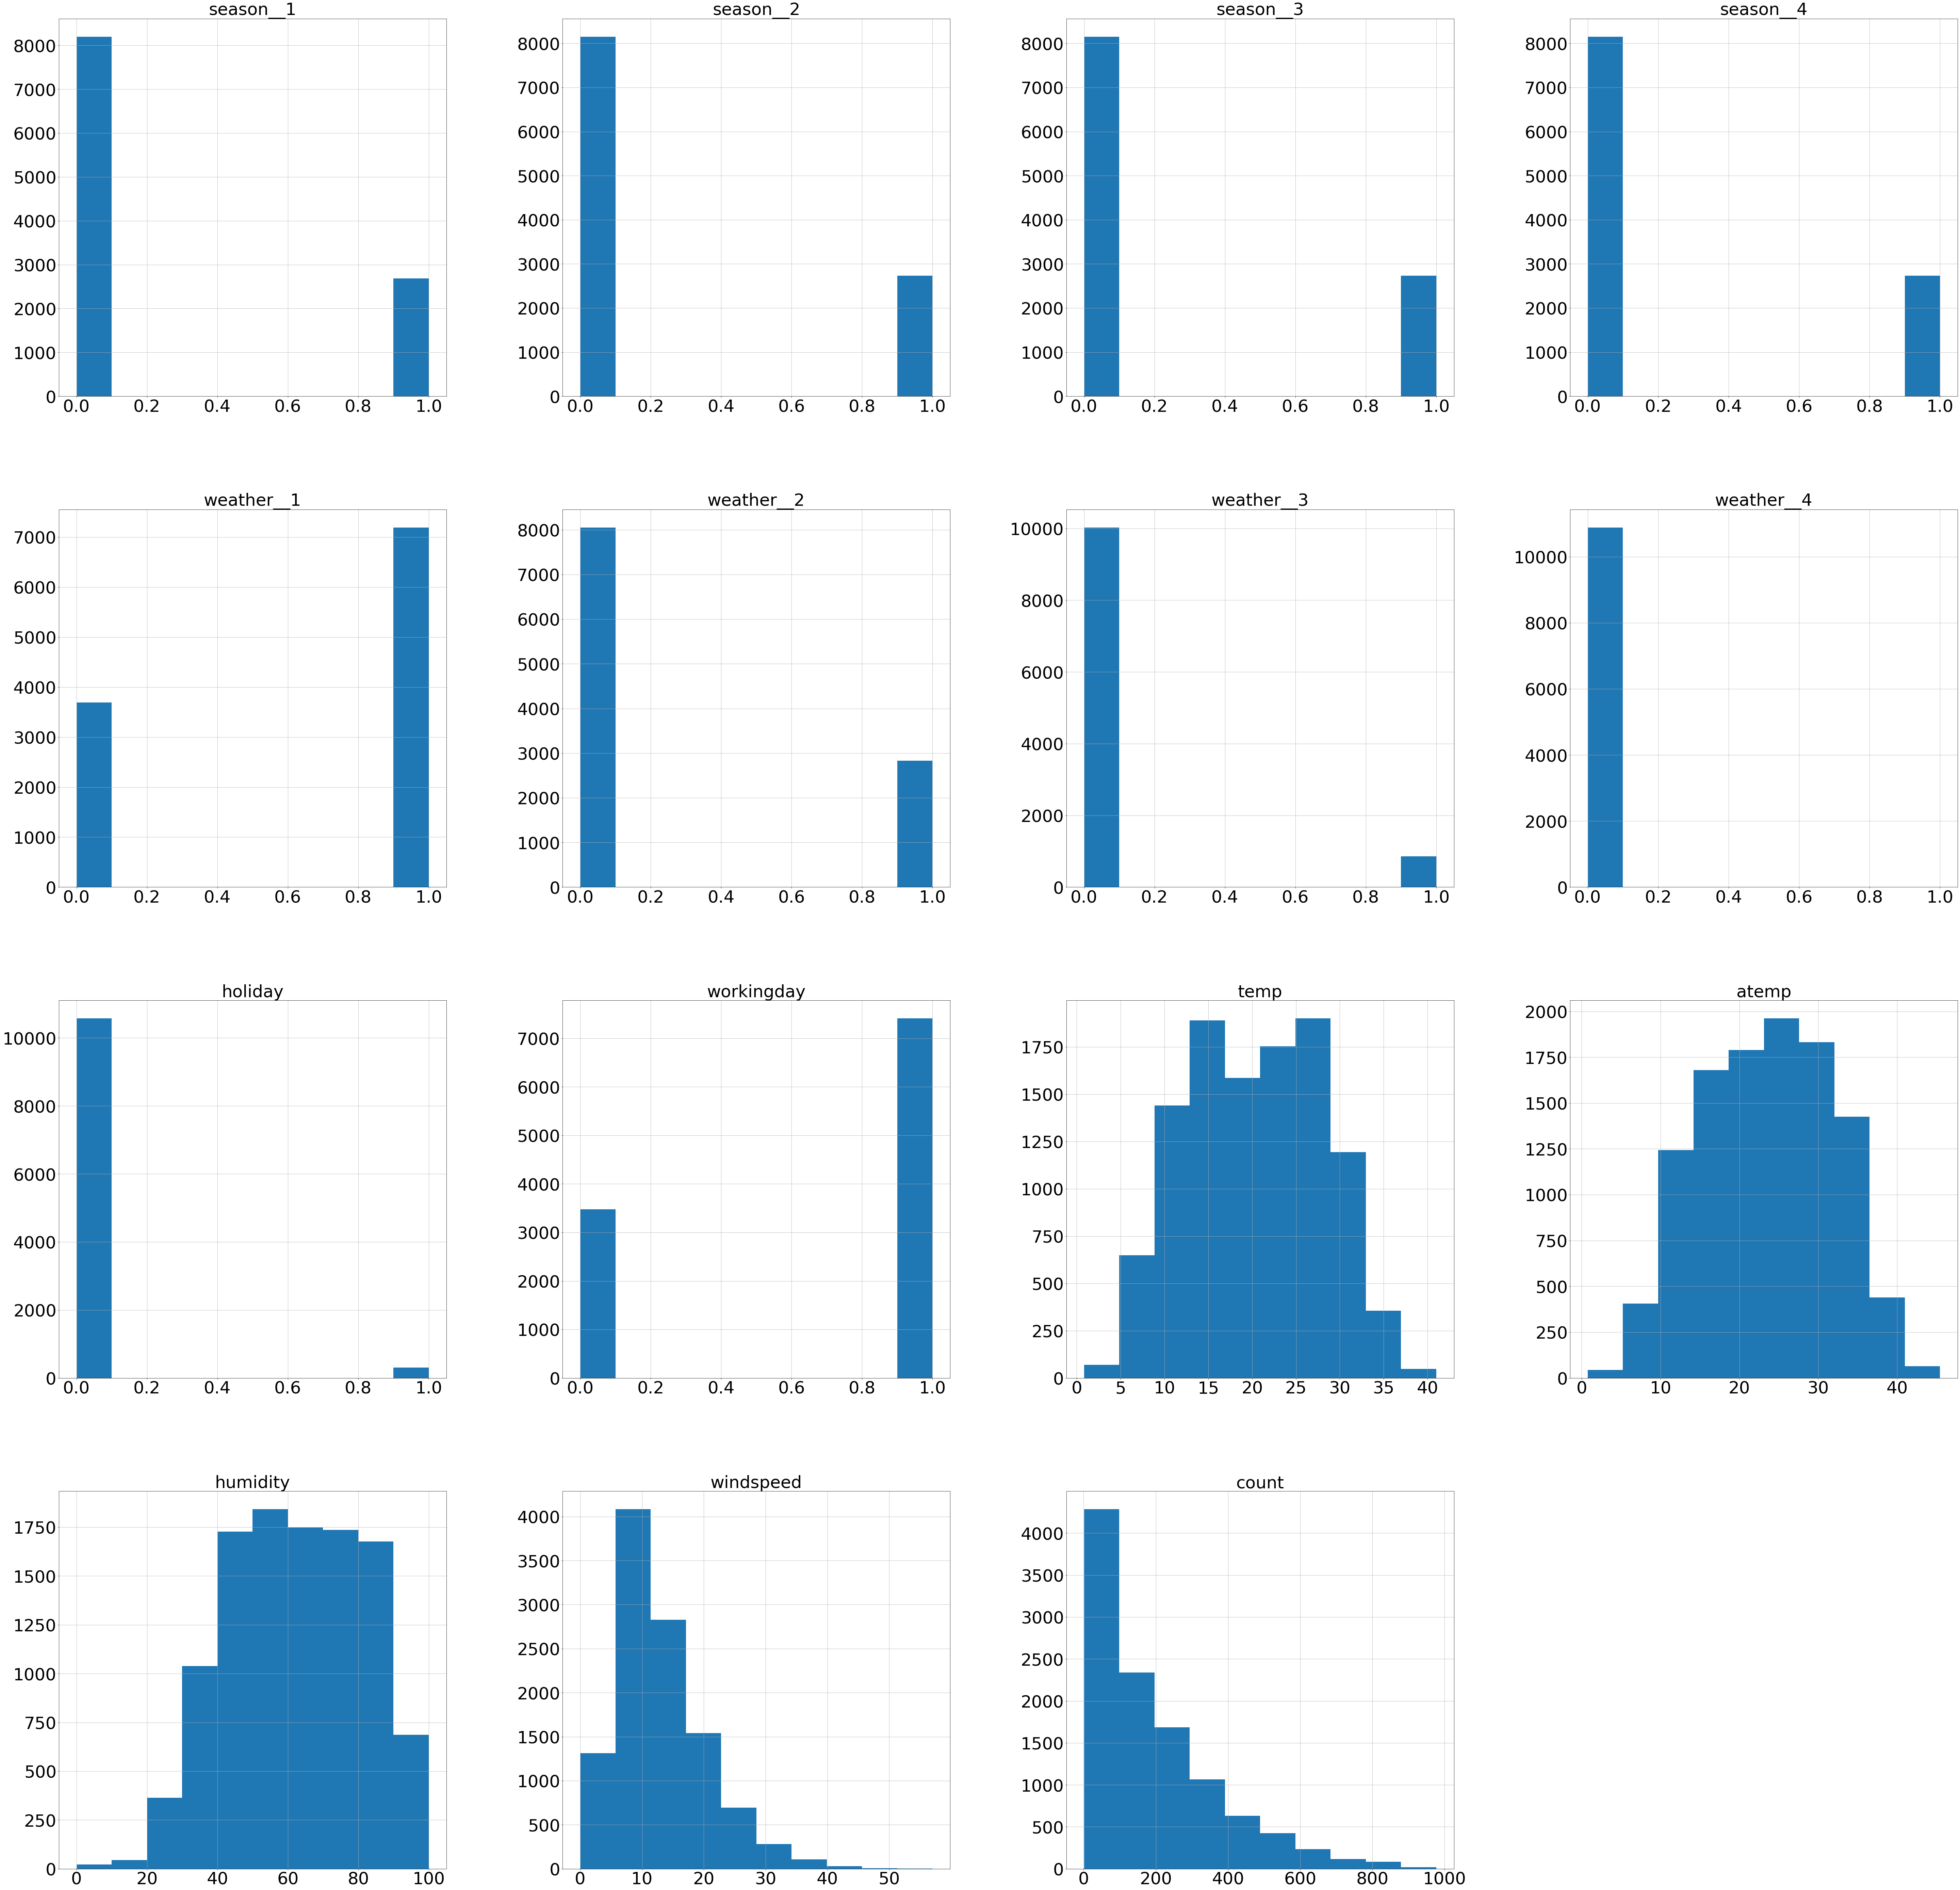

In [60]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
%matplotlib inline
import matplotlib
params = {'axes.titlesize':'50',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
train.hist(figsize = (100, 100), xlabelsize = 50, ylabelsize =50 )

# plt.figsize((100, 100))
plt.show()

In [57]:
train_date["datetime"] = pd.to_datetime(train_date["datetime"])



0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24     0
25     1
26     2
27     3
28     4
29     6
Name: datetime, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [60]:

train_date["datetime"] = pd.to_datetime(train_date["datetime"])
train_hour = pd.get_dummies(train_date["datetime"].dt.hour.astype('category'), prefix = "hour_")
train_day = pd.get_dummies(train_date["datetime"].dt.day_name().astype('category'), prefix = "day_")
train_month = pd.get_dummies(train_date["datetime"].dt.month_name().astype('category'), prefix = "month_")

train_new = pd.concat([train, train_day, train_hour, train_month], axis = 1) 


In [61]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 58 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season__1         10886 non-null  uint8  
 1   season__2         10886 non-null  uint8  
 2   season__3         10886 non-null  uint8  
 3   season__4         10886 non-null  uint8  
 4   weather__1        10886 non-null  uint8  
 5   weather__2        10886 non-null  uint8  
 6   weather__3        10886 non-null  uint8  
 7   weather__4        10886 non-null  uint8  
 8   holiday           10886 non-null  int64  
 9   workingday        10886 non-null  int64  
 10  temp              10886 non-null  float64
 11  atemp             10886 non-null  float64
 12  humidity          10886 non-null  int64  
 13  windspeed         10886 non-null  float64
 14  count             10886 non-null  int64  
 15  day__Friday       10886 non-null  uint8  
 16  day__Monday       10886 non-null  uint8 

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season__1   10886 non-null  uint8  
 1   season__2   10886 non-null  uint8  
 2   season__3   10886 non-null  uint8  
 3   season__4   10886 non-null  uint8  
 4   weather__1  10886 non-null  uint8  
 5   weather__2  10886 non-null  uint8  
 6   weather__3  10886 non-null  uint8  
 7   weather__4  10886 non-null  uint8  
 8   holiday     10886 non-null  int64  
 9   workingday  10886 non-null  int64  
 10  temp        10886 non-null  float64
 11  atemp       10886 non-null  float64
 12  humidity    10886 non-null  int64  
 13  windspeed   10886 non-null  float64
 14  count       10886 non-null  int64  
dtypes: float64(3), int64(4), uint8(8)
memory usage: 680.5 KB


In [63]:
train.head()

,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4,holiday,workingday,temp,atemp,humidity,windspeed,count
0,1,0,0,0,1,0,0,0,0,0,9.84,14.395,81,0.0,16
1,1,0,0,0,1,0,0,0,0,0,9.02,13.635,80,0.0,40
2,1,0,0,0,1,0,0,0,0,0,9.02,13.635,80,0.0,32
3,1,0,0,0,1,0,0,0,0,0,9.84,14.395,75,0.0,13
4,1,0,0,0,1,0,0,0,0,0,9.84,14.395,75,0.0,1


In [64]:
test_date["datetime"] = pd.to_datetime(test_date["datetime"])

test_hour = pd.get_dummies(test_date["datetime"].dt.hour.astype('category'), prefix = "hour_")
test_day = pd.get_dummies(test_date["datetime"].dt.day_name().astype('category'), prefix = "day_")
test_month = pd.get_dummies(test_date["datetime"].dt.month_name().astype('category'), prefix = "month_")

test_new = pd.concat([test, test_day, test_month, test_hour], axis = 1) 

# create a new feature
train[?] = ?
test[?] = ?

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [65]:
# View are new featu
test_new.head()

,season__1,season__2,season__3,season__4,weather__1,weather__2,weather__3,weather__4,holiday,workingday,...,hour__14,hour__15,hour__16,hour__17,hour__18,hour__19,hour__20,hour__21,hour__22,hour__23
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


array([[<AxesSubplot:title={'center':'season__1'}>,
        <AxesSubplot:title={'center':'season__2'}>,
        <AxesSubplot:title={'center':'season__3'}>,
        <AxesSubplot:title={'center':'season__4'}>],
       [<AxesSubplot:title={'center':'weather__1'}>,
        <AxesSubplot:title={'center':'weather__2'}>,
        <AxesSubplot:title={'center':'weather__3'}>,
        <AxesSubplot:title={'center':'weather__4'}>],
       [<AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

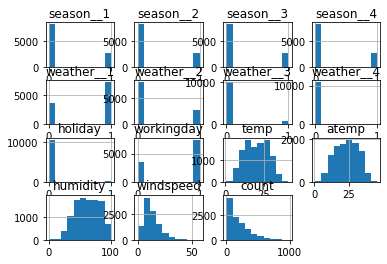

In [66]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [68]:
predictor_new_features = TabularPredictor(label = "count",problem_type ="regression").fit(train_new, presets = "best_quality",time_limit = 600)

No path specified. Models will be saved in: "AutogluonModels/ag-20230113_031319/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230113_031319/"
AutoGluon Version:  0.6.2
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 26 20:36:53 UTC 2022
Train Data Rows:    10886
Train Data Columns: 57
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2161.78 MB
	Train Data (Original)  Memory Usage: 1.08 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

In [69]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -58.273876      12.452275  504.962278                0.000680           0.337789            3       True         16
1          CatBoost_BAG_L2  -58.861124      10.649139  433.385911                0.058256          44.440348            2       True         13
2          LightGBM_BAG_L2  -58.961048      10.859787  409.462494                0.268903          20.516930            2       True         11
3     ExtraTreesMSE_BAG_L2  -59.064839      11.383873  404.895394                0.792989          15.949831            2       True         14
4   RandomForestMSE_BAG_L2  -59.243215      11.331447  423.717380                0.740563          34.771816            2       True         12
5      WeightedEnsemble_L2  -60.106612       9.022540  357.505648         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -164.55761532708044,
  'KNeighborsDist_BAG_L1': -179.0093022915555

In [70]:
predictions_new = predictor_new_features.predict(test_new)
predictions_new.head()

0    26.134216
1     7.638230
2     6.862323
3     5.934259
4     5.117857
Name: count, dtype: float32

In [71]:
# Remember to set all negative values to zero
# How many negative values do we have?
neg_count = 0
preds = predictions_new
for i in  range(len(preds)):
    if(preds[i]<0):
        neg_count = neg_count + 1
        preds[i] = 0
        
print("How many negative values do we have? Answer: {}".format(neg_count))

How many negative values do we have? Answer: 0


In [72]:
# Same submitting predictions
submission_new_features = submission
submission_new_features["count"] = predictions_new
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [73]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 376kB/s]
Successfully submitted to Bike Sharing Demand

In [75]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-13 03:24:36  new features                       complete  0.47999      0.47999       
submission.csv               2023-01-13 03:04:32  first raw submission               complete  1.32667      1.32667       
submission_new_hpo.csv       2023-01-12 02:26:53  new features with hyperparameters  complete  1.28216      1.28216       
submission_new_features.csv  2023-01-12 01:13:25  new features                       complete  1.31157      1.31157       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [76]:
import autogluon.core as ag


gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [92]:
predictor_new_hpo = TabularPredictor(label = "count" , problem_type ="regression").fit(train_new, num_bag_folds = 10,presets = "best_quality",time_limit = 600,hyperparameters=hyperparameters, 
                                                                                       hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 176.19s of remaining time.
	-67.7179	 = Validation score   (-root_mean_squared_error)
	0.76s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 424.76s ... Best model: "WeightedEnsemble_L3"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230113_042843/")


In [91]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                             model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   NeuralNetTorch_BAG_L1/3d7eaeba  -67.105905       0.133934   59.984034                0.133934          59.984034            1       True          6
1              WeightedEnsemble_L3  -67.200181       2.217706  266.974832                0.001040           0.289001            3       True         13
2               LightGBM_BAG_L2/T2  -67.379585       1.972047  233.078219                0.199293          30.910553            2       True          9
3               LightGBM_BAG_L2/T3  -67.571905       2.017373  235.775278                0.244620          33.607612            2       True         10
4               LightGBM_BAG_L2/T1  -67.744112       1.973321  233.323673                0.200568          31.156007            2       True          8
5               LightGBM_B

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1/3d7eaeba': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -71.73603458497769,
  'LightGBM_BAG_L1/T2': -70.91770989571776,
  'LightGBM_BAG_L1/T3': -71.6639962640228,
  'LightGBM_BAG_L1/T4': -136.68283351646537,
  'LightGBM_BAG_L1/T5': -75.02576681803174,
  'NeuralNetTorch_BAG_L1/3d7eaeba': -67.1

In [81]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test_new)
predictions_new_hpo.head()



0    24.653038
1    16.041925
2    12.276829
3     9.252185
4     7.478875
Name: count, dtype: float32

In [82]:
# Remember to set all negative values to zero
# How many negative values do we have?
neg_count = 0
preds = predictions_new_hpo
for i in  range(len(preds)):
    if(preds[i]<0):
        neg_count = neg_count + 1
        preds[i] = 0
        
print("How many negative values do we have? Answer: {}".format(neg_count))

How many negative values do we have? Answer: 0


In [83]:
# Same submitting predictions
submission_new_hpo = submission 
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [84]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 304kB/s]
Successfully submitted to Bike Sharing Demand

In [85]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-13 03:50:13  new features with hyperparameters  complete  0.54065      0.54065       
submission_new_features.csv  2023-01-13 03:24:36  new features                       complete  0.47999      0.47999       
submission.csv               2023-01-13 03:04:32  first raw submission               complete  1.32667      1.32667       
submission_new_hpo.csv       2023-01-12 02:26:53  new features with hyperparameters  complete  1.28216      1.28216       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

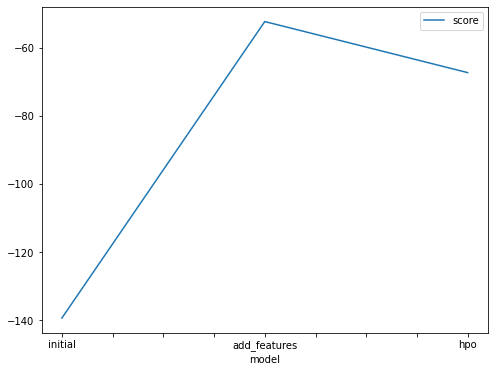

In [87]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
                "score": [-139.38, -52.27, -67.27]

    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

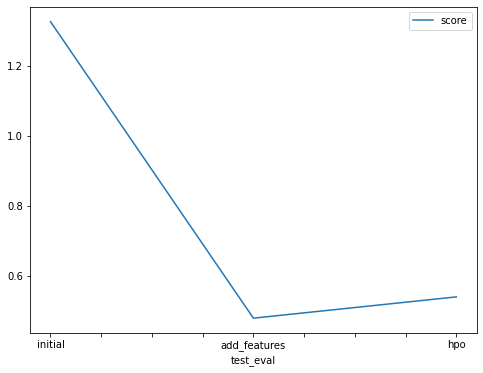

In [88]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.32667, 0.4799, 0.54065]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [89]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["preset","The Number Of Features" , "learning rate"],
    "hpo2": ["time limit","prest" , "dropout_prob"],
    "hpo3": ["","time limit" , "num_leaves"],
    "score": [1.32667, 0.4799, 0.54065]
})

,model,hpo1,hpo2,hpo3,score
0,initial,preset,time limit,,1.32667
1,add_features,The Number Of Features,prest,time limit,0.47990
2,hpo,learning rate,dropout_prob,num_leaves,0.54065
